## Cricket Score Prediction

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import math

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
#Loading the data

matches_data = pd.read_csv("matches.csv")
deliveries_data = pd.read_csv("deliveries.csv")

In [4]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Data Cleaning

In [6]:
ipl_data = pd.merge(matches_data, deliveries_data, how = "right", left_on = "id", right_on = "match_id")
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
def fcnStripDatetime(x):
    try:
        return datetime.strptime(x, '%Y-%m-%d')
    except:
        return datetime.strptime(x, '%d/%m/%y')

In [8]:
ipl_data["date"] = ipl_data["date"].apply(fcnStripDatetime)
ipl_data.sort_values(by = ["date"], ascending = False).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179077,11415,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN
178907,11415,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,1,Mumbai Indians,Chennai Super Kings,13,2,KH Pandya,Ishan Kishan,SN Thakur,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
178920,11415,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,1,Mumbai Indians,Chennai Super Kings,15,3,KA Pollard,Ishan Kishan,Imran Tahir,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178919,11415,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,1,Mumbai Indians,Chennai Super Kings,15,2,KA Pollard,Ishan Kishan,Imran Tahir,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178918,11415,2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,1,Mumbai Indians,Chennai Super Kings,15,1,KA Pollard,Ishan Kishan,Imran Tahir,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [9]:
ipl_data_sorted = ipl_data.sort_values(by = ["date", "id", "is_super_over", "inning", "over", "ball"])

In [10]:
complete_data = pd.DataFrame(ipl_data_sorted.values, columns=ipl_data_sorted.columns)
complete_data = complete_data.drop(labels = ["match_id"], axis = 1)
complete_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
1,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
3,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [11]:
complete_data.to_csv(r"C:\Users\RISHABH CHOUDHARY\Desktop\Projects\IPL.csv", index = False)

In [12]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                179078 non-null  object        
 1   season            179078 non-null  object        
 2   city              177378 non-null  object        
 3   date              179078 non-null  datetime64[ns]
 4   team1             179078 non-null  object        
 5   team2             179078 non-null  object        
 6   toss_winner       179078 non-null  object        
 7   toss_decision     179078 non-null  object        
 8   result            179078 non-null  object        
 9   dl_applied        179078 non-null  object        
 10  winner            178706 non-null  object        
 11  win_by_runs       179078 non-null  object        
 12  win_by_wickets    179078 non-null  object        
 13  player_of_match   178706 non-null  object        
 14  venu

##### There are some missing values in "City", "winner" (could be due to ties), "player_of_the_match", "umpire1", "umpire2", "umpire3", "player_dismissed", "dismissla_kind", "fielder"

In [13]:
data_clean = complete_data.copy()

In [14]:
data_clean["team1"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [15]:
#Reballing couple of teams whose name has changed
data_clean.replace("Delhi Daredevils", "Delhi Capitals", inplace=True)
data_clean.replace("Deccan Chargers", "Sunrisers Hyderabad", inplace=True)

In [16]:
#Removing the teams that are not in IPL anymore
teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',]

data_clean = data_clean[(data_clean['team1'].isin(teams)) & (data_clean['team2'].isin(teams))]

In [17]:
data_clean = data_clean[data_clean["is_super_over"] == 0]
data_clean = data_clean[data_clean["inning"].isin([1, 2])]

In [18]:
grouped_data = data_clean.groupby(by = ["id", "inning"]).sum()

In [19]:
grouped_data = grouped_data[["total_runs"]]
grouped_data.columns = ["innings_score"]

In [20]:
grouped_data

innings_score
id    inning               
1     1                 207
      2                 172
5     1                 157
      2                 142
7     1                 178
...                     ...
11413 2                 170
11414 1                 155
      2                 162
11415 1                 152
      2                 157

[1281 rows x 1 columns]

In [21]:
data_clean = pd.merge(data_clean, grouped_data, how = "left", left_on = ["id", "inning"], right_on = ["id", "inning"])
data_clean.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,innings_score
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,222
1,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,222
2,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN,222
3,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,222
4,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,222


In [22]:
data_clean["wicket_fall"] = 0
data_clean["wicket_fall"] = data_clean["player_dismissed"].notnull().astype("int")

In [23]:
grouping = data_clean.groupby(by = ["id", "inning"])

In [24]:
all_id = data_clean["id"].unique()
all_inning = data_clean["inning"].unique()

In [25]:
rolling_data_for_merge = pd.DataFrame([], columns=["over", "id", "inning", "score", "wickets_gone", "runs_in_last_4", "wickets_in_last_4"])
for m_id in all_id:
    for inn in all_inning:
        try:
            df = grouping.get_group((m_id, inn))
        except:
            continue
        y = df.groupby(by = ["over"]).sum()
        y["score"] = y["total_runs"].cumsum()
        y["wickets_gone"] = y["wicket_fall"].cumsum()
        y["runs_in_last_4"] = y["total_runs"].rolling(4).sum()
        y["wickets_in_last_4"] = y["wicket_fall"].rolling(4).sum()
        y = y.drop(['season', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', \
               'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', \
               'total_runs', 'innings_score', 'wicket_fall'], axis=1)
        y["id"] = m_id
        y["inning"] = inn
        y.reset_index(level=0, inplace=True)
        rolling_data_for_merge = pd.concat([rolling_data_for_merge, y], axis=0)

In [26]:
data_clean1 = pd.merge(data_clean, rolling_data_for_merge, how="left", on=["id", "inning", "over"])

In [27]:
# Dropping the features that are no needed
data_final = data_clean1[data_clean1["ball"] == 1]
data_final = data_final[['id', 'venue', 'team1', 'team2', 'inning', 'over',
         'score', 'wickets_gone', 'runs_in_last_4', 'wickets_in_last_4', 'innings_score'] ]

In [28]:
data_final = data_final[(data_clean1["over"] > 3) & (data_clean1["over"] < 20)]

In [29]:
data_final["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association St

In [30]:
stadium_dict = {'M Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bangalore', 'Punjab Cricket Association Stadium, Mohali':'PCA IS Bindra Stadium, Mohali', 
                'Feroz Shah Kotla':'Arun Jaitley Stadium, Delhi', 'Wankhede Stadium': 'Wankhede Stadium, Mumbai', 'Eden Gardens':'Eden Gardens, Kolkata', 
                'Sawai Mansingh Stadium':'Sawai Mansingh Stadium, Jaipur', 'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium, Hyderabad',
                'MA Chidambaram Stadium, Chepauk':'MA Chidambaram Stadium, Chennai', 'Dr DY Patil Sports Academy': 'DY Patil Sports Stadium, Navi Mumbai',
                'Newlands':'Others', "St George's Park":'Others', 'Kingsmead':'Others', 'SuperSport Park':'Others', 'Buffalo Park':'Others', 
                'New Wanderers Stadium':'Others', 'De Beers Diamond Oval':'Others', 'OUTsurance Oval':'Others', 
                'Brabourne Stadium':'Brabourne Stadium, Mumbai', 'Sardar Patel Stadium, Motera':'Sardar Patel Stadium, Ahmedabad', 'Barabati Stadium':'Barabati Stadium, Cuttack',
                'Vidarbha Cricket Association Stadium, Jamtha':'Vidarbha Cricket Association Stadium, Nagpur', 'Himachal Pradesh Cricket Association Stadium':'HPCA Stadium, Dharamshala',
                'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium, Pune',
                'Shaheed Veer Narayan Singh International Stadium':'Shaheed Veer Narayan Singh International Stadium, Raipur', 'JSCA International Stadium Complex':'JSCA International Stadium Complex, Ranchi', 
                'Sheikh Zayed Stadium':'Others', 'Sharjah Cricket Stadium':'Others', 'Dubai International Cricket Stadium':'Others', 'Maharashtra Cricket Association Stadium':'Maharashtra Cricket Association Stadium, Pune', 
                'Punjab Cricket Association IS Bindra Stadium, Mohali':'PCA IS Bindra Stadium, Mohali', 'Holkar Cricket Stadium':'Holkar Cricket Stadium, Indore', 'M. A. Chidambaram Stadium':'MA Chidambaram Stadium, Cheenai', 
                'Feroz Shah Kotla Ground':'Arun Jaitley Stadium, Delhi', 'M. Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bangalore', 'Rajiv Gandhi Intl. Cricket Stadium': 'Rajiv Gandhi International Stadium, Hyderabad', 
                'IS Bindra Stadium':'PCA IS Bindra Stadium, Mohali', 'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam'}

In [31]:
data_final["venue"] = data_final["venue"].map(stadium_dict)
data_final["venue"].value_counts()

Others                                                                2390
Eden Gardens, Kolkata                                                 2180
M Chinnaswamy Stadium, Bangalore                                      2104
Arun Jaitley Stadium, Delhi                                           2027
Wankhede Stadium, Mumbai                                              1998
Rajiv Gandhi International Stadium, Hyderabad                         1773
PCA IS Bindra Stadium, Mohali                                         1547
MA Chidambaram Stadium, Chennai                                       1425
Sawai Mansingh Stadium, Jaipur                                        1338
Sardar Patel Stadium, Ahmedabad                                        378
Brabourne Stadium, Mumbai                                              353
Maharashtra Cricket Association Stadium, Pune                          350
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam     308
DY Patil Sports Stadium, 

In [32]:
data_final.fillna(0, inplace = True)
data_final = data_final.reset_index()
data_final = data_final.drop(["index", "id", "inning"], axis=1)

In [33]:
# Handling the categorical features

le1 = LabelEncoder()
ipl_team1 = le1.fit_transform(data_final["team1"])
ipl_team2 = le1.transform(data_final["team2"])

In [34]:
ohe1 = OneHotEncoder()
ipl_team1_ohe = ohe1.fit_transform(ipl_team1.reshape(-1,1))
ipl_team1_ohe = pd.DataFrame(ipl_team1_ohe.toarray(), columns=[x+"_1" for x in le1.classes_])

ohe2 = OneHotEncoder()
ipl_team2_ohe = ohe2.fit_transform(ipl_team2.reshape(-1,1))
ipl_team2_ohe = pd.DataFrame(ipl_team2_ohe.toarray(), columns=[x+"_2" for x in le1.classes_])

In [35]:
le2 = LabelEncoder()
venue = le2.fit_transform(data_final["venue"])
ohe3 = OneHotEncoder()
venue_ohe = ohe3.fit_transform(venue.reshape(-1,1))
venue_ohe = pd.DataFrame(venue_ohe.toarray(), columns=le2.classes_)

In [36]:
std_scaler = StandardScaler()
scaled_numeric_data = data_final[["score", "wickets_gone", "runs_in_last_4", "wickets_in_last_4"]] 
#pd.DataFrame(std_scaler.fit_transform(data_final[["score", "wickets_gone", "runs_in_last_4", "wickets_in_last_4"]].values), columns=["score", "wickets_gone", "runs_in_last_4", "wickets_in_last_4"])

In [37]:
# Preparing the data for algorithms

X_tree = pd.concat([venue_ohe, ipl_team1_ohe, ipl_team2_ohe, data_final[["over"]], scaled_numeric_data], axis = 1)

In [38]:
ipl_team1_ohe.drop([ipl_team1_ohe.columns[len(ipl_team1_ohe.columns)-1]], axis=1, inplace = True)
ipl_team2_ohe.drop([ipl_team2_ohe.columns[len(ipl_team2_ohe.columns)-1]], axis=1, inplace = True)
venue_ohe.drop([venue_ohe.columns[len(venue_ohe.columns)-1]], axis=1, inplace = True)

In [39]:
# Preparing the data for algorithms

X = pd.concat([venue_ohe, ipl_team1_ohe, ipl_team2_ohe, data_final[["over"]], scaled_numeric_data], axis = 1)

In [40]:
y = data_final[["innings_score"]]

In [41]:
X_train = X.iloc[0: math.floor(len(X) * 0.8) ,:].values
X_test = X.iloc[math.floor(len(X) * 0.8): ,:].values

Xt_train = X_tree.iloc[0: math.floor(len(X_tree) * 0.8) ,:].values
Xt_test = X_tree.iloc[math.floor(len(X_tree) * 0.8): ,:].values

In [42]:
y_train = y.iloc[0: math.floor(len(X) * 0.8) ,:].values
y_test = y.iloc[math.floor(len(X) * 0.8): ,:].values

#### Model Building

In [43]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import GridSearchCV, ShuffleSplit

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [44]:
def fcnPrintErrorMetrics(y_test, y_pred):
    print('R2:', metrics.r2_score(y_test, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    sns.distplot(y_test - y_pred)

R2: 0.3300662362688098
MAE: 18.474865215613434
MSE: 611.9531809526152
RMSE: 24.737687461697288


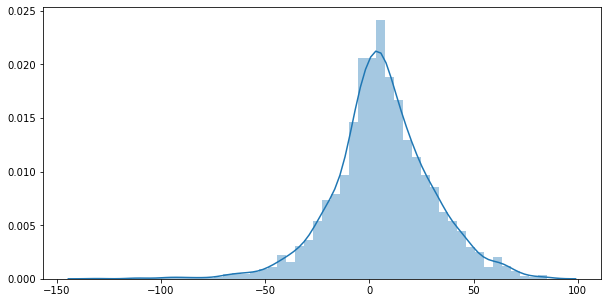

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred)

R2: 0.3310515528253516
MAE: 18.45803889353597
MSE: 611.053140331192
RMSE: 24.71948907908883


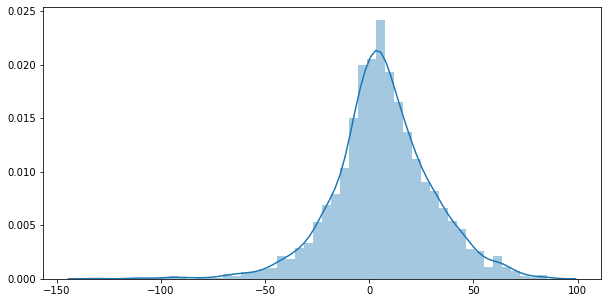

In [46]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)
y_pred2 = ridge_regressor.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred2)

R2: 0.3310515528253516
MAE: 18.45803889353597
MSE: 611.053140331192
RMSE: 24.71948907908883


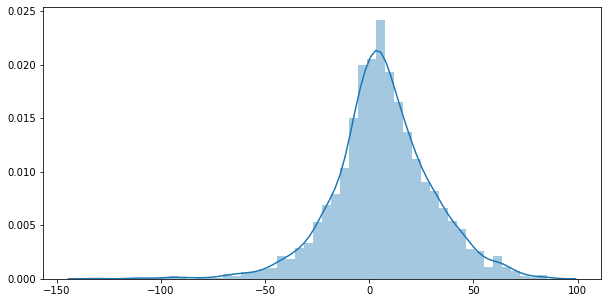

In [47]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
y_pred3 = ridge_regressor.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred3)

R2: -0.14077848218301603
MAE: 24.31520733451089
MSE: 1042.0478243193988
RMSE: 32.28076554729455


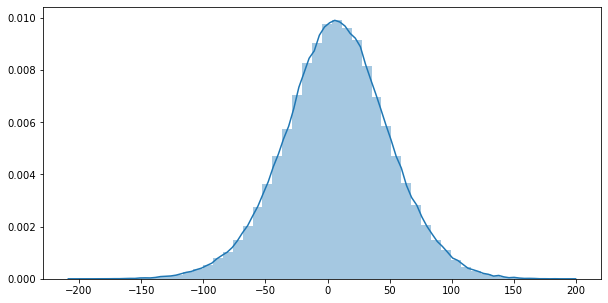

In [48]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(Xt_train, y_train)
dt_reg.score(Xt_test, y_test)
y_pred4 = dt_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred4)

R2: 0.28706509494278976
MAE: 18.67188420869231
MSE: 651.232713711931
RMSE: 25.519261621605178


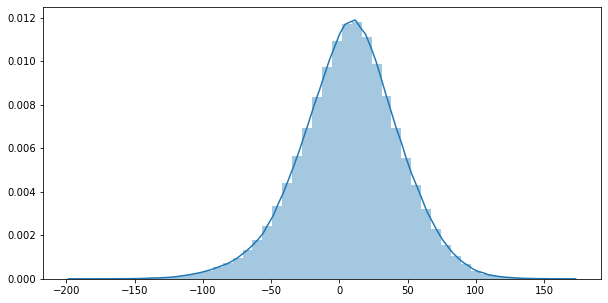

In [49]:
rf_reg = RandomForestRegressor()
rf_reg.fit(Xt_train, y_train)
rf_reg.score(Xt_test, y_test)
y_pred5 = rf_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred5)

R2: 0.07586331000402469
MAE: 22.706040724146373
MSE: 844.1556728360019
RMSE: 29.054357209134775


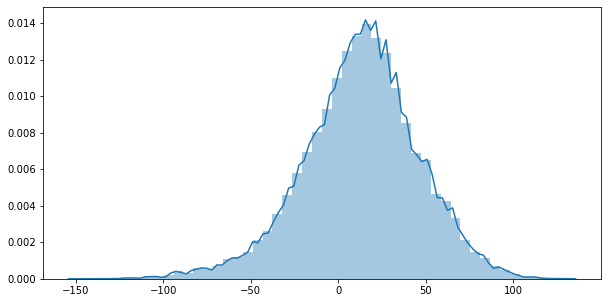

In [50]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(Xt_train, y_train)
ab_reg.score(Xt_test, y_test)
y_pred6 = ab_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred6)

R2: 0.14244347116239175
MAE: 21.875019567015652
MSE: 783.3378075260383
RMSE: 27.988172636419804


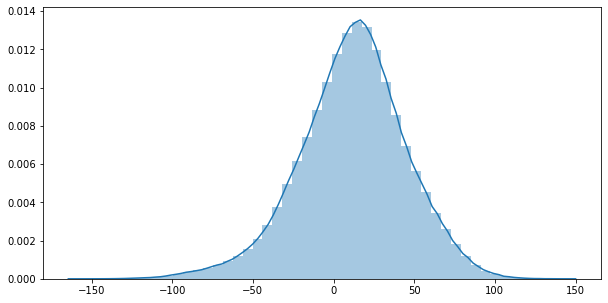

In [51]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(Xt_train, y_train)
gb_reg.score(Xt_test, y_test)
y_pred7 = gb_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred7)

R2: 0.20896094129992637
MAE: 19.94449729158997
MSE: 722.5772075334726
RMSE: 26.880796259290246


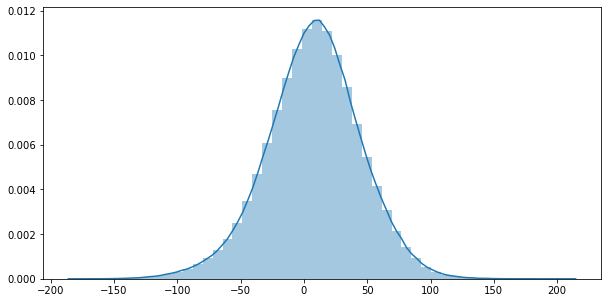

In [52]:
xgb_reg = XGBRegressor()
xgb_reg.fit(Xt_train, y_train)
xgb_reg.score(Xt_test, y_test)
y_pred8 = xgb_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred8)

In [53]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40],
                'selection': ['random', 'cyclic']
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_pa = find_best_model_using_gridsearchcv(X.values, y.values)
model_pa

,model,best_score,best_params
0,linear_regression,0.472640,{'normalize': False}
1,lasso,0.472649,"{'alpha': 0.001, 'selection': 'random'}"
2,ridge,0.472643,{'alpha': 1}


In [55]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 20, 500], 'max_depth': [2, 4, 6, 8], 
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200, 300], 
            }
        }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

model_p = find_best_model_using_gridsearchcv(X_tree.values, y.values)
model_p

,model,best_score,best_params
0,random_forest,0.473478,"{'max_depth': 8, 'n_estimators': 500}"
1,xgboost,0.645523,{'n_estimators': 300}


R2: 0.47842184833082857
MAE: 16.08166066357416
MSE: 472.714834405362
RMSE: 21.742006218501594


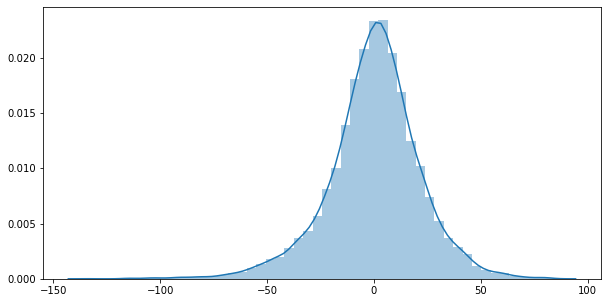

In [56]:
# Saving the model and json files

lin_reg_f = LinearRegression()
lin_reg_f.fit(X, y)
y_pred_f = lin_reg_f.predict(X)

fcnPrintErrorMetrics(y, y_pred_f)

R2: 0.15170741689628242
MAE: 20.710990204042236
MSE: 774.8756260882006
RMSE: 27.836587903121327


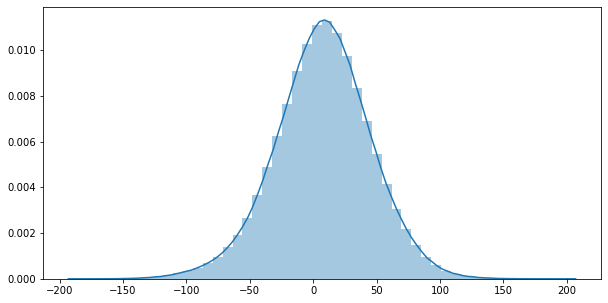

In [62]:
xgb_reg = XGBRegressor(n_estimators=300)
xgb_reg.fit(Xt_train, y_train)
xgb_reg.score(Xt_test, y_test)
y_pred8 = xgb_reg.predict(Xt_test)

fcnPrintErrorMetrics(y_test, y_pred8)

In [61]:
import pickle
import json

In [63]:
with open('cricket_score_predictor.pickle','wb') as f:
    pickle.dump(lin_reg_f,f)

In [65]:
cat_feature_columns = {
    "teams_columns" : [col for col in le1.classes_], 
    "venue" : [col for col in le2.classes_],
    "overs" : list(range(4, 20)), 
    "wickets" : list(range(0, 10)), 
    "data_columns" : [col for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))